In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
def printConfusionMatrix(cm, labels, title=""):

    df_cm = pd.DataFrame(cm, labels, labels)
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}).set_title(title)# font size

    pyplot.show()

## Load Data

In [3]:
with open('data/data_eval_arduino.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
X_eval = [d[0] for d in data]
y_eval_ard = [d[1] for d in data]
y_eval = [d[2] for d in data]

## Load Model

In [5]:
with open('models/rf_model.pkl', 'rb') as f:
    model = pickle.load(f)


ImportError: cannot import name 'parallel_helper' from 'sklearn.utils.fixes' (C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\utils\fixes.py)

## Evaluate Peformances

### Arduino

In [6]:
f1_score(y_eval, y_eval_ard, average="weighted")

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4525030525030525

In [7]:
print(classification_report(y_eval, y_eval_ard))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.50      1.00      0.67        20
           2       1.00      0.30      0.46        20
           3       0.40      1.00      0.57        20
           4       0.63      0.60      0.62        20
           5       1.00      0.25      0.40        20

    accuracy                           0.53       120
   macro avg       0.59      0.53      0.45       120
weighted avg       0.59      0.53      0.45       120



C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
print(confusion_matrix(y_eval, y_eval_ard))

[[ 0 20  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  0  6 11  3  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  8 12  0]
 [ 0  0  0 11  4  5]]


### Full Model

In [9]:
y_eval_pred = model.predict(X_eval)

ValueError: Number of features of the model must match the input. Model n_features is 5 and input n_features is 32 

In [10]:
f1_score(y_eval, y_eval_pred, average="weighted")

NameError: name 'y_eval_pred' is not defined

In [11]:
print(classification_report(y_eval, y_eval_pred))

NameError: name 'y_eval_pred' is not defined

In [52]:
print(confusion_matrix(y_eval, y_eval_pred))

[[20  0  0  0  0  0]
 [ 0 19  1  0  0  0]
 [ 0  6 14  0  0  0]
 [ 0  0  0 18  0  2]
 [ 0  0  1  0 19  0]
 [ 0  0  0  0  0 20]]


### Confusion Matrix Comparison

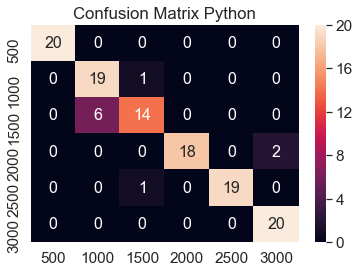

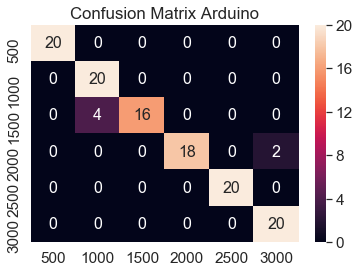

In [53]:
labels = [500* i for i in range(1,7)]

cm_python = confusion_matrix(y_eval, y_eval_pred)
cm_arduino = confusion_matrix(y_eval, y_eval_ard)

printConfusionMatrix(cm_python, labels, "Confusion Matrix Python")
printConfusionMatrix(cm_arduino, labels, "Confusion Matrix Arduino")
